In [1]:
#Data Camp course, Mon. Apr 23, 3:11 pm

## Chapter 1

In [2]:
#Introduction to exploratory data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
import datetime

In [4]:
df_swing = pd.read_csv('https://raw.githubusercontent.com/johnashu/datacamp/master/statistical-thinking-in-python-part-1/2008_swing_states.csv')

In [5]:
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


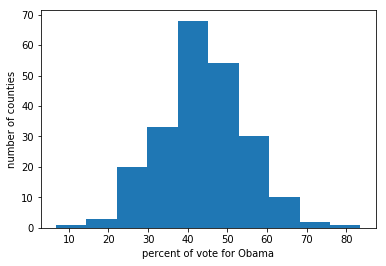

In [6]:
# _ is a common dummy variable in Python
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

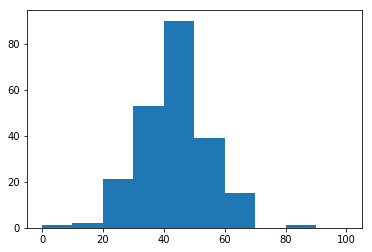

In [7]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_ = plt.hist(df_swing['dem_share'], bins = bin_edges)
plt.show()

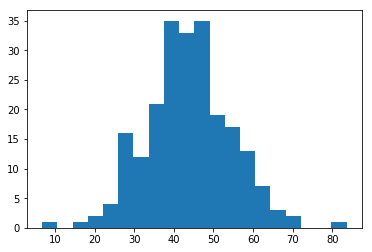

In [8]:
_ = plt.hist(df_swing['dem_share'], bins = 20)
plt.show()

In [9]:
import seaborn as sns

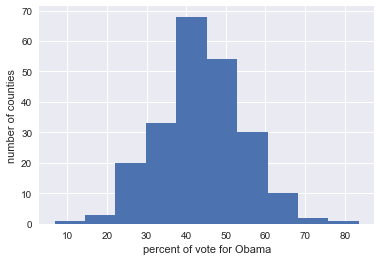

In [10]:
sns.set()
_ = plt.hist(df_swing['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

Binning bias
- The same data may be interpreted differently depending on choice of bins

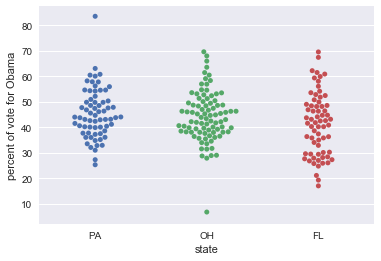

In [11]:
#Bee swarm plot
    #requires well ordered pandas dataframe
    #cols are variables
    #rows are measures
_ = sns.swarmplot(
    x = 'state', y = 'dem_share', data = df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()

Note that Obama got less than 50% of the vote in each of the three swing states

## County level voting data for all states East and West of the Mississippi

### (ECDF)
#### Empirical cumulative distribution function 
x-value is the quantity measured (% of vote for Obama)
y-value is fraction of data points smaller than the corresopnding x-value

#### Making and ECDF

In [12]:
import numpy as np

In [13]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [14]:
x = np.sort(df_swing['dem_share'])
list(x)[0:5]
#seems to be sorted in ascending order

[6.7999999999999998,
 17.059999999999999,
 19.329999999999998,
 21.149999999999999,
 24.809999999999999]

In [15]:
y = np.arange(1, len(x) + 1) / len(x)
#what are we doing here?
    # scaling the x axis over it's own magnitude?
list(y[0:5])

[0.0045045045045045045,
 0.0090090090090090089,
 0.013513513513513514,
 0.018018018018018018,
 0.022522522522522521]

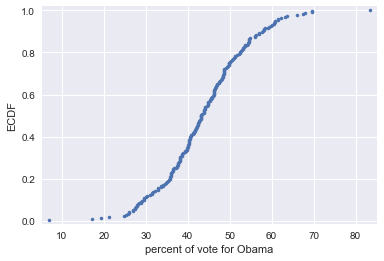

In [16]:
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

Note, that about %78 of counties (y-value) had less than 50% support (x-value) for Obama

In [17]:
def ecdf(data):
    '''Compute (ECDF) 
    Empirical Cumulative Distribution Function 
    for a one-dimensional array of measurements.'''
    # number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n #just scaling y ticks from 0-1
    
    return x, y

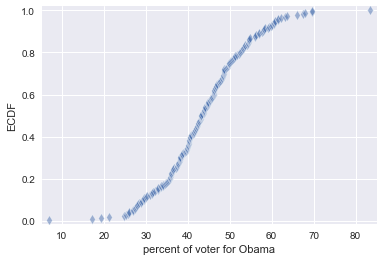

In [18]:
# Compute the ECDF for the county level dem_share of swing states
x, y = ecdf(df_swing.dem_share)

# Generate plot
_ = plt.plot(x, y, marker = 'd', linestyle = 'none',
            alpha = 0.5, markeredgecolor = 'w' ,
            markeredgewidth = .8)

# set margins
plt.margins(0.02)

# label the axes
_ = plt.xlabel('percent of voter for Obama')
_ = plt.ylabel('ECDF')

plt.show()

#### Let's plot multiple series

In [19]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [20]:
df_swing.state.value_counts()

OH    88
FL    67
PA    67
Name: state, dtype: int64

In [21]:
x_pa, y_pa = ecdf(df_swing.dem_share[df_swing.state == 'PA'])
x_fl, y_fl = ecdf(df_swing.dem_share[df_swing.state == 'FL'])
x_oh, y_oh = ecdf(df_swing.dem_share[df_swing.state == 'OH'])

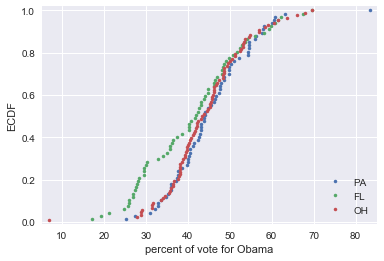

In [22]:
plt.plot(x_pa, y_pa, marker = '.', linestyle = 'none')
plt.plot(x_fl, y_fl, marker = '.', linestyle = 'none')
plt.plot(x_oh, y_oh, marker = '.', linestyle = 'none')

plt.margins(0.02)

plt.legend(('PA', 'FL', 'OH'), loc = 'lower right')

plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')

plt.show()

Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone. -- John Tukey

## Chapter 2 Intro to Summary Stats: The sample mean and median

Mean - can be skewed by outliers
Median - is immune to extreme values

In [23]:
df_swing.columns

Index(['state', 'county', 'total_votes', 'dem_votes', 'rep_votes',
       'dem_share'],
      dtype='object')

In [24]:
np.mean(df_swing.dem_share[df_swing.state == 'PA'])

45.476417910447765

In [25]:
np.median(df_swing.dem_share[df_swing.state == 'PA'])
#equivalent to the 50th percentile

44.030000000000001

In [26]:
np.percentile(df_swing['dem_share'], [25,50,75])

array([ 37.3025,  43.185 ,  49.925 ])

### Enter Box Plots
bottom of the box is the 25th percentile
middle of the box is the 50th percentile
top of the box is the 75th percentile
whiskers are at 1.5 the interquartile range (IQR) or to the extent of the data, whichevers is less extreme.
Outliers (more than 2 iqrs away from median) are dots outside of the whiskers.

Box plots are great if your swarm plot is too cluttered

In [27]:
#specify array of percentiles to work with
percentiles = np.array([2.5, 25, 50, 75, 97, .5])

In [28]:
#Compute percentiles
ptiles_dem_share = np.percentile(df_swing.dem_share, percentiles)
ptiles_dem_share

array([ 25.58675,  37.3025 ,  43.185  ,  49.925  ,  63.2739 ,  17.29835])

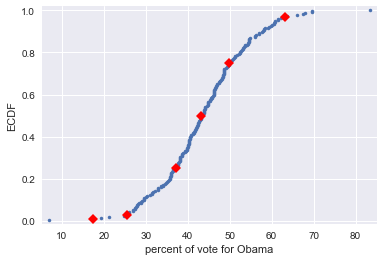

In [29]:
#plot the ECDF
_ = plt.plot(x, y, '.')
plt.margins(0.02)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
#Overlay percentiles as red diamonds
_ = plt.plot(ptiles_dem_share, percentiles/100, marker = 'D', color = 'red',
            linestyle = 'none')
plt.show()

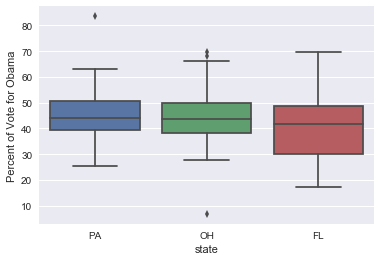

In [30]:
#Create box plot with Seaborn's default settings
_ = sns.boxplot(x = 'state', y = 'dem_share', data = df_swing)
#labels
_ = plt.xlabel('state')
_ = plt.ylabel('Percent of Vote for Obama')

plt.show()

### Variance and standard deviation
#### Variance
The mean squared distance of the data from their mean. (For each data point we take the distance from the mean and then take the average of all of these squared distances.) NOTE: that since it has been squared its units no longer corresond to the original value measured. 

In [31]:
dem_share_FL = df_swing.dem_share[df_swing.state == 'FL']

In [32]:
np.var(dem_share_FL)
#

147.44278618846064

#### Standard Deviation
This is the squared root of the variance

In [33]:
np.std(dem_share_FL)

12.142602117687158

In [34]:
differences = dem_share_FL - np.mean(dem_share_FL)
#an array of distances from the mean

In [35]:
diff_sq = differences**2
#squaring these 
    #(not sure if we're squaring them cause some would be negative or if it's a trig thing. (Although that dosen't make sense. This is just a one dimensional spread of values, don't need trig in one dimension. We're probably squaring them cause otherwise the sum would be skewed, which is necessary for the average of the distances))
variance_explicit = np.mean(diff_sq)
variance_explicit

147.44278618846064

In [36]:
# Computing the variance using NumPy:
variance_np = np.var(dem_share_FL)
variance_np

147.44278618846064

In [37]:
np.sqrt(variance_explicit)
#explicitly compute the standard deviation

12.142602117687158

In [38]:
np.std(dem_share_FL)
#call the numpy computation

12.142602117687158

### Covariance and Pearson correlation coefficient

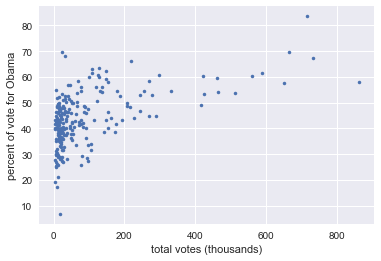

In [39]:
#scatter plot of total votes in swing states
_ = plt.plot(df_swing.total_votes/1000, df_swing.dem_share,
            marker = '.', linestyle = 'none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

plt.show()

In [40]:
# A summary statistic to go along with the scatter plot

#### Covariance
Start with a given point. Measure the distance from point to the vertical and horizontal mean lines. (distance from the mean). The covariance is the average of the product of these two. 
 - (You can see how it's an adaptation of the variance, but for some reason they don't seem concerned about negative values skewing this mean).

If the covariance is positive we say the covariance is positive. I.E. they are positively correlated.

Conversely if the covariance is negative we say that the data is negatively correlated

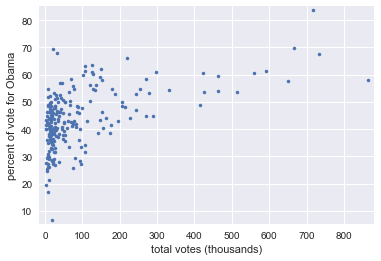

In [41]:
_ = plt.plot(df_swing.total_votes/1000, df_swing.dem_share,
            marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')

plt.show()

In [42]:
# Computing the covariance matrix: covariance_matrix
covariance_matrix = np.cov(df_swing.total_votes,
                          df_swing.dem_share)
covariance_matrix
    # this is awesome. This is what Massih knew when he showed us the correlation matrix in R
#NOTICE the diagonal is symmetric. What does this mean? That each variable is highly correlated with itself?

array([[  2.02451039e+10,   8.17309362e+05],
       [  8.17309362e+05,   1.14763447e+02]])

for the 2x2 matrix.
[0,1] and [1,0] are the covariances
[0,0] is the variance fo the data in x
[1,1] is the variance of the data in y

In [43]:
covariance_matrix[0,1]
#extract the covariance of total_votes to dem_share
    #looks like the more populated a county the more democratic

817309.36184052844

#### Pearson correlation coefficient
For a more general measurement of how variables depend on each other we look for one that is "dimensionless" i.e. has no units.
We divide the covariance by the product of the standard deviation of each axis (dimension).

p = Pearson correlation = covariance/(std of x)(std of y) = "ro"

NOTICE:

p = variability due to codependence / independent variability

it is dimensionless and ranges from -1 to 0 to 1 (negative correlation, no correlation, and positive correlation).

In [44]:
#Computing the Pearson correlation coefficient
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between 
    two arrayws."""
    # Compute correlation matrix : corr_mat
    corr_mat = np.corrcoef(x, y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [45]:
# Compute the Pearson correlation coefficient for total votes and dem share
r = pearson_r(df_swing.dem_share, df_swing.total_votes)
#order won't matter
r

0.53619736495867809

## Chapter 3 Probabilistic logic and statistical inference
Probabilistic reasoning allows us to describe uncertainty. 
#### Statistical inference 
Process from measured data to probabilistic conclusions of expected value of next measurement. 

### Random number generators and hacker statistics
* simulate repeated measurements using python

Pascal studied games of chance

In [46]:
np.random.random()
# simulating a coin where .5 is the threshold between heads and tails
# also known as a bernouli trial

0.6400827275113156

pseudo random number generator starts with a seed
giving the same sequence of "random" numbers for each seed

So, for reproducible results it's a good idea to use:
np.random.seed() to set the seed

In [47]:
#Simulating 4 coin flips
np.random.seed(42)

random_numbers = np.random.random(size = 4) #for 4 trials

random_numbers

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848])

In [48]:
heads = random_numbers < 0.5

heads

array([ True, False, False, False], dtype=bool)

In [49]:
np.sum(heads)

1

In [50]:
#Brute force measurement of probability of getting all heads 
#in a 4 flip trial

#Hacker Statistics
n_all_heads = 0 #initializing the count

for _ in range(10000): #ten thousand
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 10000

0.0619

In [51]:
#for comparison:
(1/2)**4

0.0625

#### Hackers Statistics probabilities
* Determine how to simulate data
* Simulate many many times
* Probability is approximately fraction of trials with the outcome of interest

In [52]:
np.random.seed(42)
#initialize random numbers
random_numbers = np.empty(100000) #hunderd thou
random_numbers

array([  4.94065646e-324,   3.23790862e-319,   2.20327533e-314, ...,
        -5.34032404e+187,   2.22011232e-314,   2.22011232e-314])

In [53]:
for i in range(100000):
    random_numbers[i] = np.random.random()

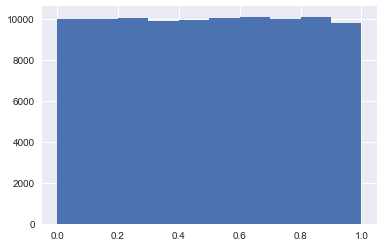

In [54]:
_ = plt.hist(random_numbers)
plt.show()
#equal chance (1 in 10,000) that a number is 
#in any of the 10 bins of the histogram

#### Bernoulli trials
You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and a probability 1-p of landing tails (failure).

In [55]:
def perform_bernoulli_trials(n, p):
    '''Perform n Bernoulli trials with success 
    probability p and return number of successes.'''
    # Initialize a number of successes:
    n_success = 0
    # Perform trials
    for i in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1
            
    return n_success

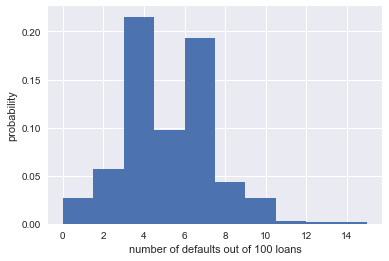

In [56]:
# Simulating mortgage defaults
np.random.seed(42)

n_defaults = np.empty(1000)

#compute the number of defaults through brute force
for i in range(1000):
#perform 1000 trials of:
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
        #where there is a 5% chance of a default

# plot the histogram
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')
plt.show()

In [57]:
#notice that though very improbable, there were a few trials
#where more than 5% of the mortgages failes. 

In [58]:
#Will the bank fail?
x, y = ecdf(n_defaults)

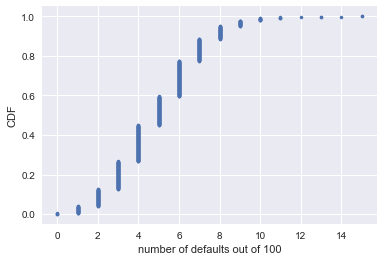

In [59]:
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')
plt.show()

In [60]:
#Compute the number of 100-loan simulations with 10 or more defaults:
n_lose_money = np.sum(n_defaults >= 10)

#Compute and print probability of losing money
print('Probability of loosing money =', n_lose_money/len(n_defaults))

Probability of loosing money = 0.022


### Probability distributions and stories: The Binomial distribution
### Probability mass function (PMF)

* The set of probabilities of discrete outcomes. (Rolling a die, only discrete values are outcomes).
    * hence, it's a discrete uniform PMF

#### Binomial distribution
* The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed

In [61]:
np.random.binomial(4, 0.5)
#4 is number of bernouli trials, i.e. coin flips
# 0.5 is the probability of success

#we get 2 heads out of four

2

In [62]:
coin_flip_samples = np.random.binomial(4, 0.5, size = 10000) #now we do 10 trials

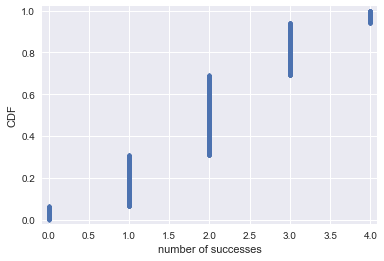

In [63]:
# The number r of heads in 4 coin flips with probability 
#0.5 of heads, is Binomially distributed
x,y = ecdf(coin_flip_samples)

_ = plt.plot(x,y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

In [64]:
samples = np.random.binomial(60, 0.1, size = 10000)

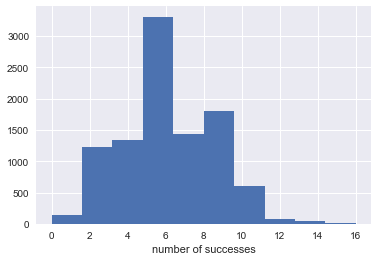

In [65]:
#PMF as histogram
_ = plt.hist(samples)
_ = plt.xlabel('number of successes')
plt.show()

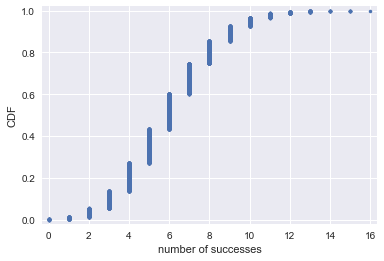

In [66]:
# The Binomial CDF
sns. set()

x,y = ecdf(samples)

_ = plt.plot(x,y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('number of successes')
_ = plt.ylabel('CDF')
plt.show()

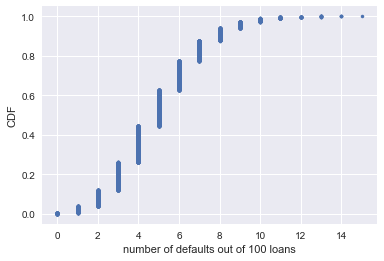

In [67]:
#Sampling out of the Binomial distribution

#Compute the probability mass function for the number of 
    #defaults we would expect for 100 loans
n_defaults = np.random.binomial(n = 100, p = 0.05, 
                                size = 10000)
    #notice this is a one line equivalent to the 10000 loop of 100 bernouli trials

#Compute the CDF
x, y = ecdf(n_defaults)

#plot the CDF
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

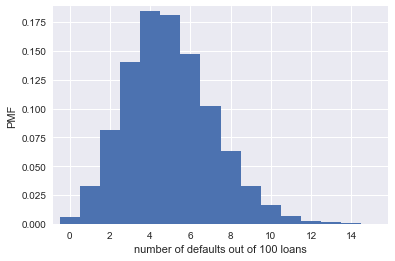

In [68]:
# Plotting a histogram of the Binomial PMF
    #Compute bin edges such that the bin edges are centered on the integers
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, normed = True, bins = bins)
plt.margins(0.02)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')
plt.show()

### Poisson processes and the Poisson distribution
David Mckay and Poisson Ville
- the timing of the next event is independent of the previous event
    - natural births in a hospital
    - hit on a website
    - meteor strikes
    - molecular collisions in a gas
    - aviation incidents
    - buses in poissonville

### Poison distribution
- the number r of arrivals of a Poisson process in a given time interval with average rate of lambda arrivals per interval is Poisson distributed.
    - the number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed
- Limit of the Binomial distribution for low probability of success and large number of trials
   - for rare events

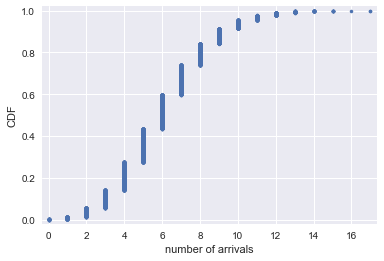

In [69]:
samples = np.random.poisson(6, size = 10000)
x, y = ecdf(samples)

_ = plt.plot(x,y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('number of arrivals')
_ = plt.ylabel('CDF')
plt.show()

Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story previously discussed. where there is an average of 6 website hits per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution. 

- [it sounds like the Poisson distribution is a more generalized vergion of binomial distribution of several bernoulli trials. The binomial distribution takes into account the regular probability of each trial, but the poisson distribution "circumvents" the need for regular probability of each trial because (by stipulation) the number of arrivals will have the same average as the average number of successes in the bernoulli trials]

In [70]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9779 3.13343447195
n = 20 Binom: 10.015 2.25467846932
n = 100 Binom: 9.9851 3.02027780014
n = 1000 Binom: 9.9751 3.14055408965


In [71]:
np.std(samples)

2.4424231820059359

## Chapter 4 Probability density functions
### Continuous variables
- i.e. speed of a train
- Michelson's 1880 error prone measurements of the speed of light
### Probability density function (PDF) 
- continous analog to the PMF (probability mass function)
- Mathematical description of the relative likelihood of observing a value of a continuous variable
    - since there are infinite values in any interval we don't bother with number of discrete possibilites. 
    - instead we look at the area under a curve
    
### Normal Distribution
- Describes a continuous variable whose PDF is symmetrical and has a single peak
- Paramaterized by the mean/center of the peak
    - this is different from calculating the mean and distribution of experimental values.
- standard deviation (how wide the curve is)

In [79]:
michelson_speed_of_light = pd.read_csv('morley.csv', index_col=0)

In [80]:
michelson_speed_of_light.head()

,Expt,Run,Speed
1,1,1,850
2,1,2,740
3,1,3,900
4,1,4,1070
5,1,5,930


In [81]:
michelson_speed_of_light.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 3 columns):
Expt     100 non-null int64
Run      100 non-null int64
Speed    100 non-null int64
dtypes: int64(3)
memory usage: 3.1 KB


In [82]:
michelson_speed_of_light.describe()

,Expt,Run,Speed
count,100.000000,100.000000,100.000000
mean,3.000000,10.500000,852.400000
std,1.421338,5.795331,79.010548
min,1.000000,1.000000,620.000000
25%,2.000000,5.750000,807.500000
50%,3.000000,10.500000,850.000000
75%,4.000000,15.250000,892.500000
max,5.000000,20.000000,1070.000000


In [83]:
michelson_speed_of_light.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1105c95f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1c653898>]], dtype=object)

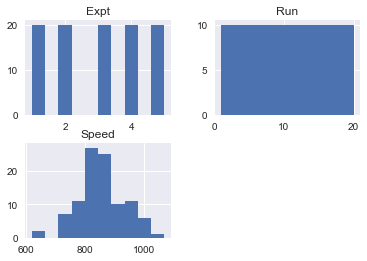

In [84]:
plt.show()

In [88]:
mean = np.mean(michelson_speed_of_light.Speed)

std = np.std(michelson_speed_of_light.Speed)

samples = np.random.normal(mean, std, size = 10000)

x,y = ecdf(michelson_speed_of_light.Speed)

x_theor, y_theor = ecdf(samples)

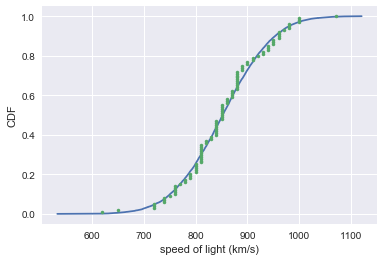

In [89]:
sns.set()

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

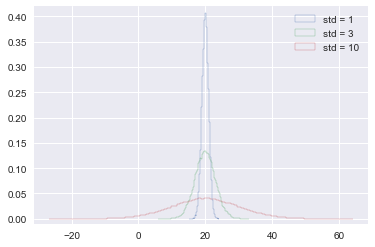

In [92]:
# Draw 100,000 samples from a Normal distribution with stds
# of interest mean of 20
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

#make histograms
_ = plt.hist(samples_std1, bins = 100, normed = True, 
            histtype = 'step')
_ = plt.hist(samples_std3, bins = 100, normed = True,
            histtype = 'step')
_ = plt.hist(samples_std10, bins = 100, normed = True,
            histtype = 'step')

# make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

#note that different stds result in differently distributed curves

## The Normal CDF
now let's look at the CDF with the same samples

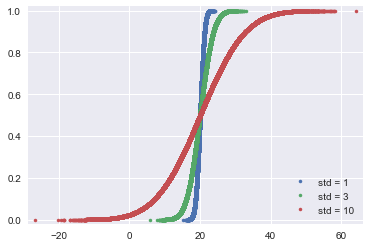

In [93]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFS all pass at through the mean at the 50th percentile; the mean and the median of a Normal distribution are equal. The width of the CDF varies with the standard deviation

## The Normal distribution: Properties and warings
The Gaussian/Normal distribution

- describes most symmetric peaked data
- seems to be ubiquitous in nature and statistics
Caveats:
- large mouth bass of MA are actually not normally distributed. 
    - close if not exact
- Mass of the large-mouth bass is not normally distributed
- real world datasets tend to have large outliers, and thus reduce the utility of the standard deviation

### Are the Belmont Stakes results Normally distributed?
removed Secretariat's year and 1970 as an anomalously slow year due to wet conditions

In [116]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

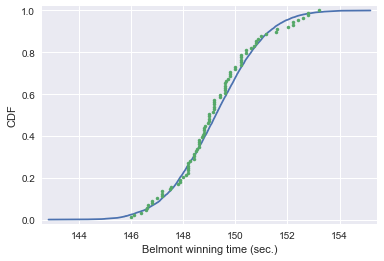

In [117]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


## What are the chances of a horse matching or beating Secretariat's record?


In [119]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000632


## Exponential Distribution
- The waiting time between arrivals of a Poisson process is Exponentially distributed
- Nuclear incidents:
    - timing of one incident is independent from all others
    
single parameter: the mean
It is not peaked

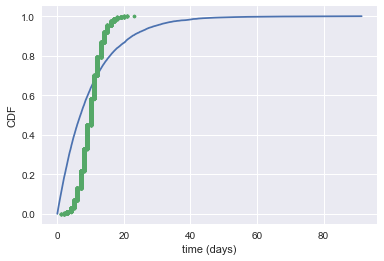

In [123]:
mean = np.mean(samples_poisson)

samples = np.random.exponential(mean, size = 10000)

x,y = ecdf(samples_poisson)

x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('time (days)')
_ = plt.ylabel('CDF')
plt.show()

When the "story describing" our probability distribution does not have a named distribution to go along with it. We can simulate it. 

In [132]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


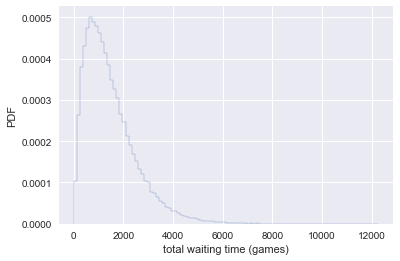

In [133]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#Notice the PDF is peaked, unlike the waiting time for a single Poisson process. 

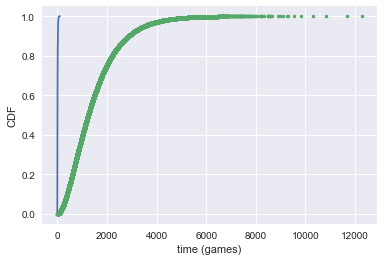

In [135]:
x,y = ecdf(waiting_times)

samples = np.random.exponential(mean, size = 100000)

x_theor, y_theor = ecdf(samples)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('time (games)')
_ = plt.ylabel('CDF')
plt.show()